In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from sklearn.feature_selection import mutual_info_regression as mi_reg

dhsData = pd.read_csv("./wrangled/DHS_data.csv", index_col = "DHS AREA")
lgaData = pd.read_csv("./wrangled/LGA_data.csv", index_col = "LGA")
depressionDHS = pd.read_csv("./wrangled/depression2018DHS.csv", index_col = "DHS AREA")
depressionLGA = pd.read_csv("./wrangled/depression.csv", index_col = "LGA")

In [43]:
lgaData.rank().to_csv('ranks.csv')

In [37]:
dhsData.columns

Index(['Depression Rate', 'cyberbullying', 'electronicMedia', 'financial',
       'food', 'healthyFamily', 'mental_health_access', 'physicalActivity',
       'psychological', 'qolSatisfaction', 'safety', 'support',
       'trustedAdult'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

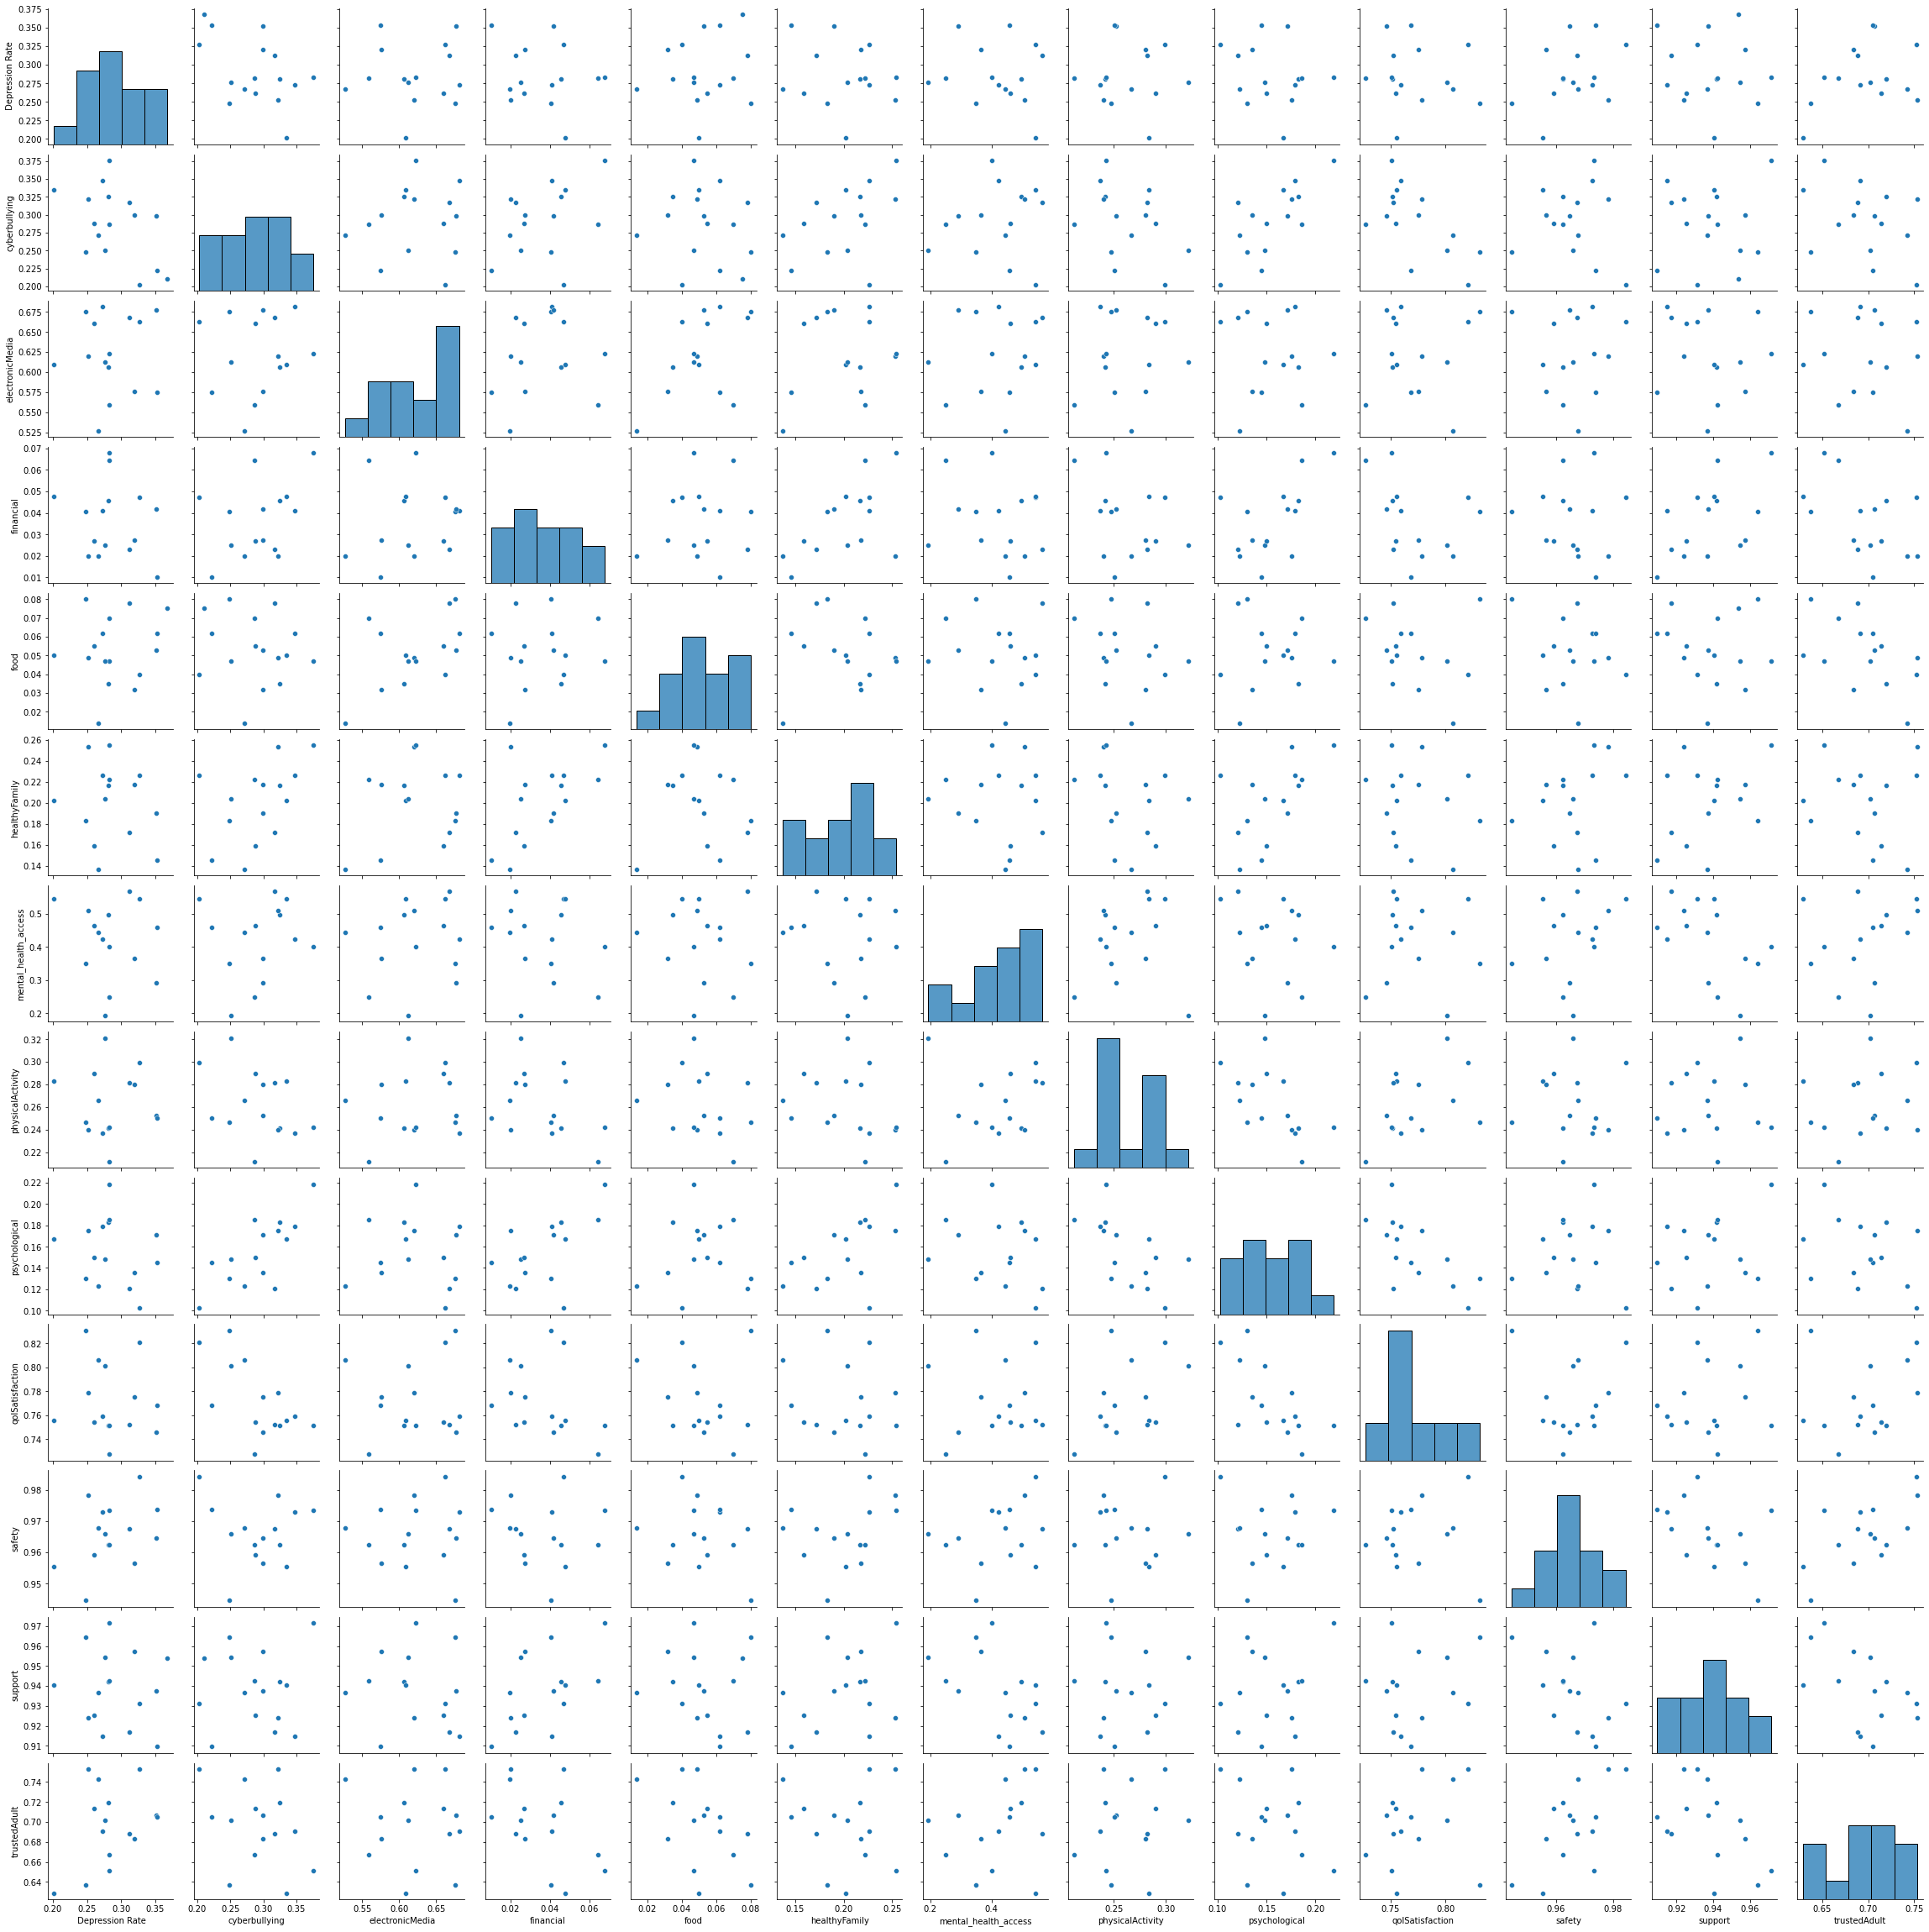

In [3]:
plt.figure(figsize = (20,20))
sns.pairplot(dhsData)

<Figure size 1440x1440 with 0 Axes>

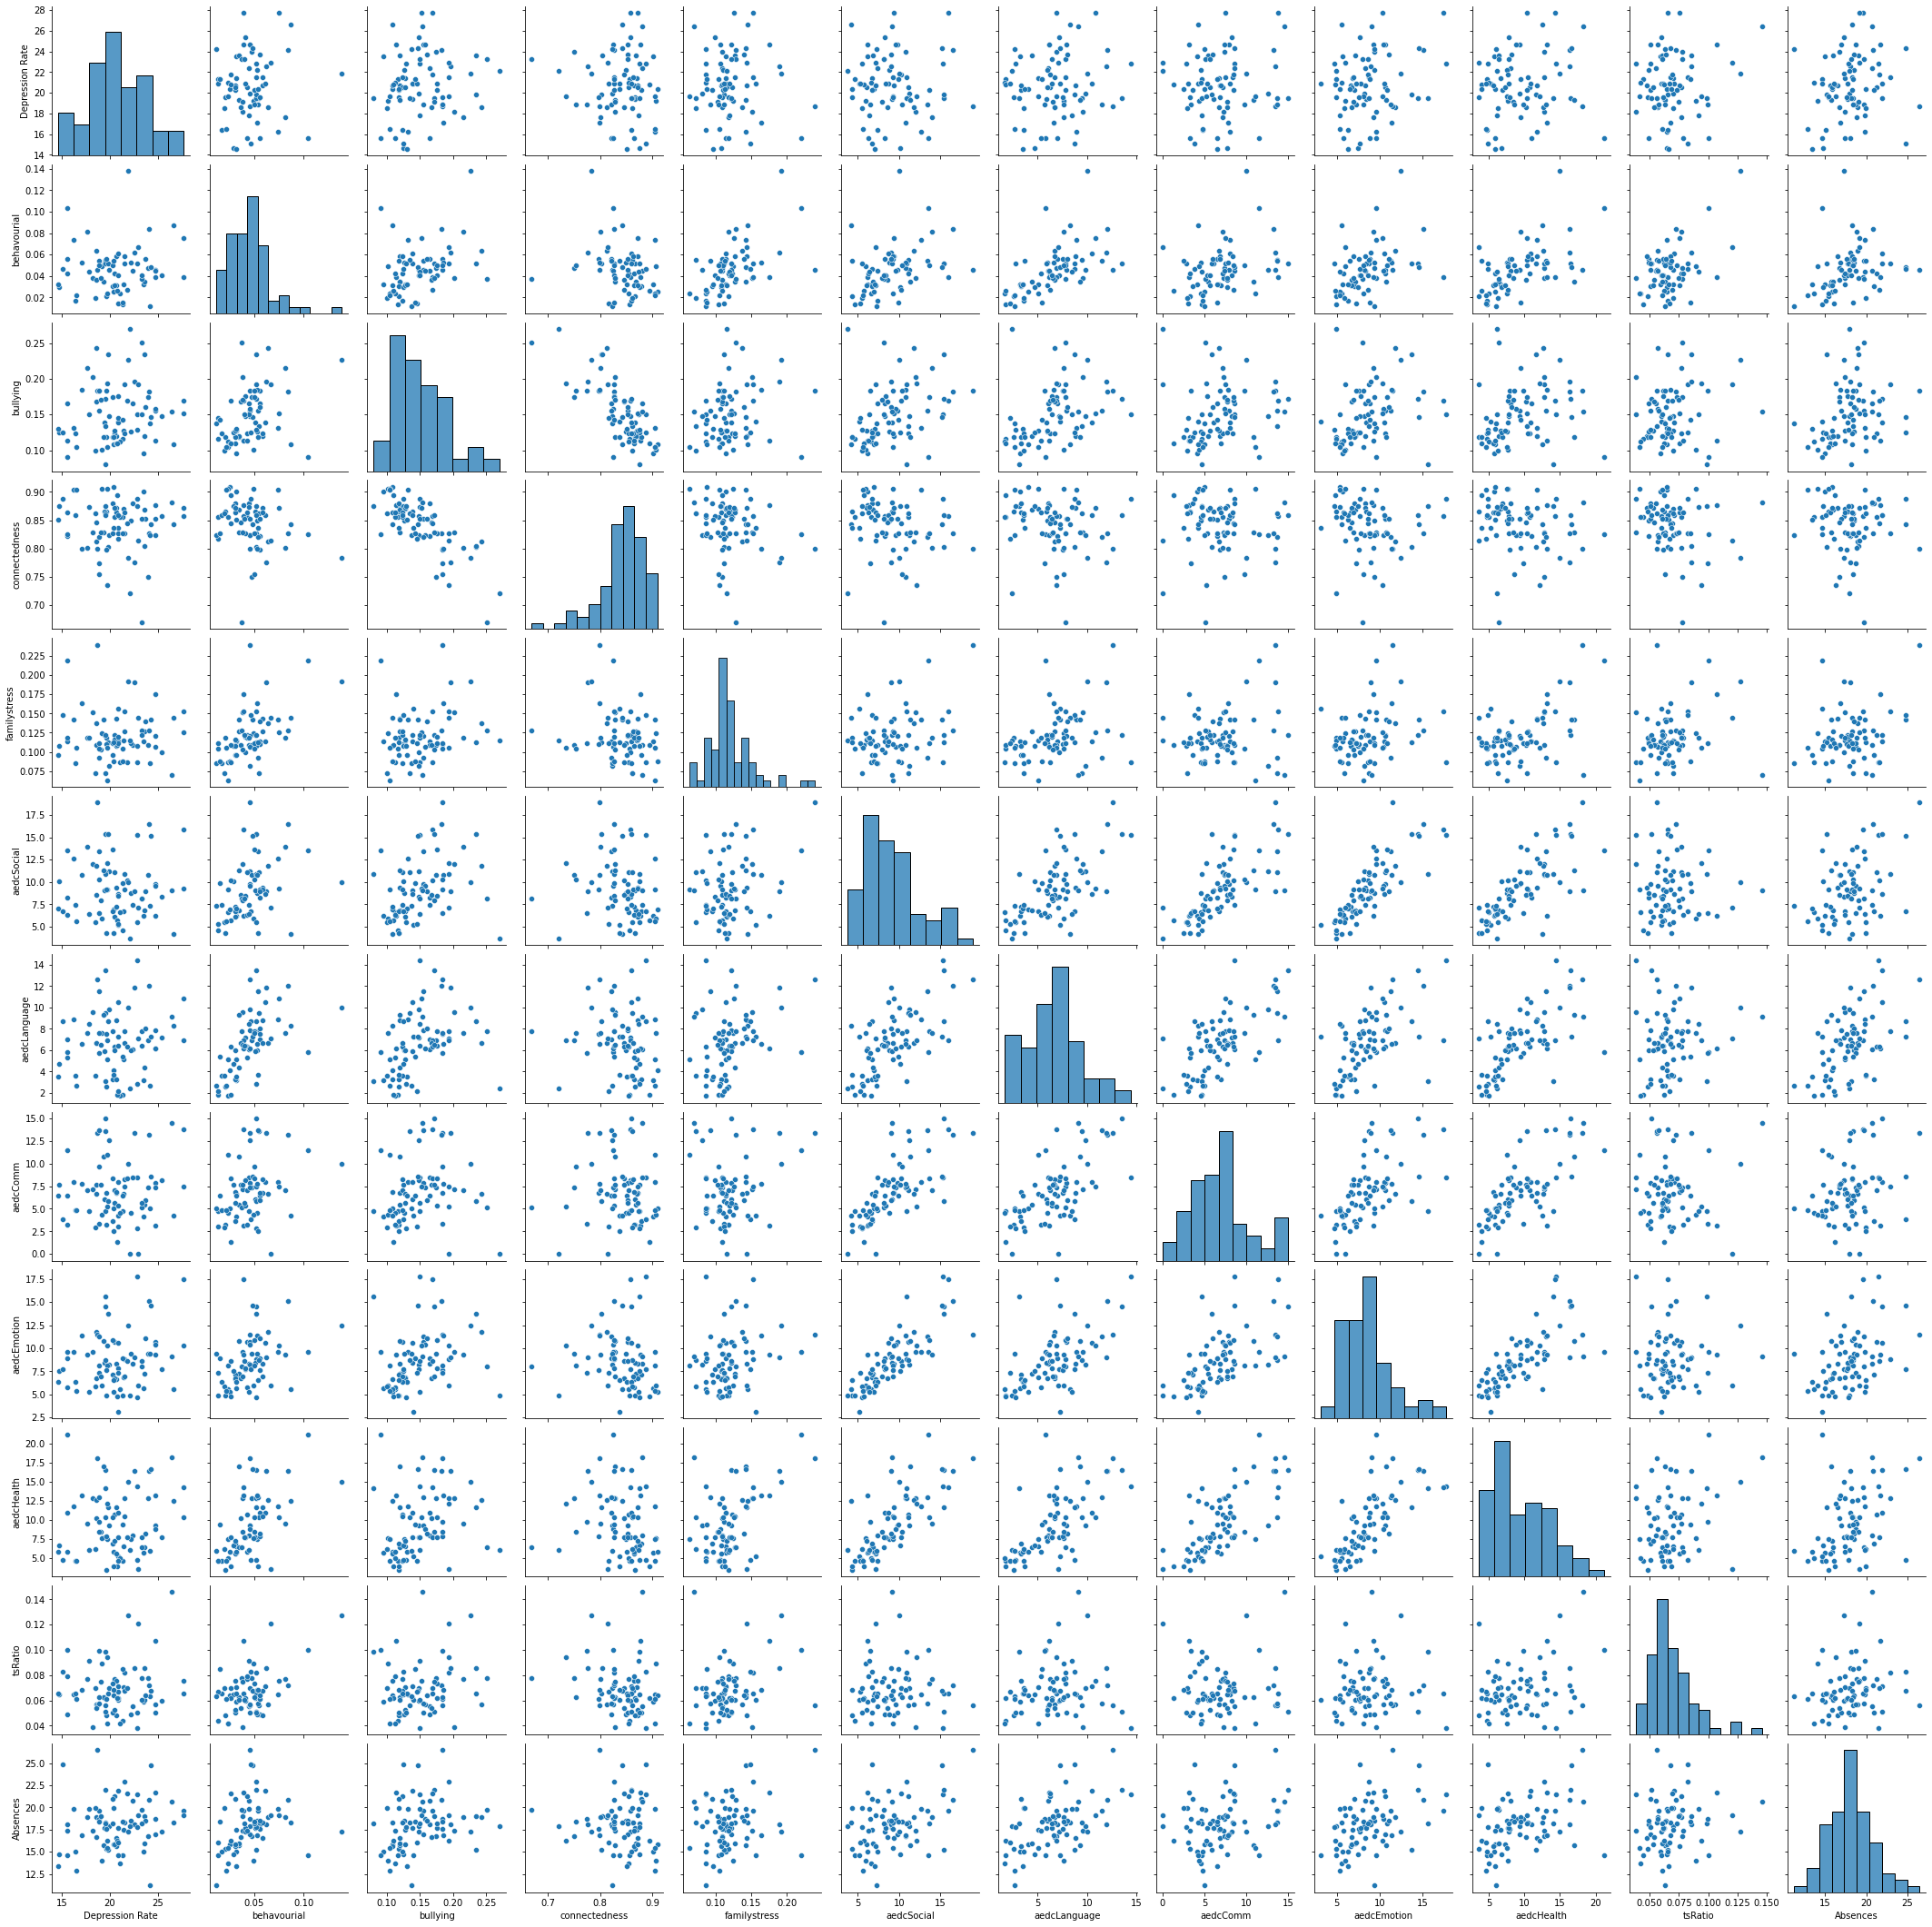

In [4]:
plt.figure(figsize = (20,20))
sns.pairplot(lgaData)

In [16]:
vicLGA = gpd.read_file('./shapefiles/VIC_LGA_POLYGON_SHP.shp')
vicDHS = gpd.read_file('./shapefiles/VIC_DHS_POLYGON_SHP.shp')

<Figure size 1440x1440 with 0 Axes>

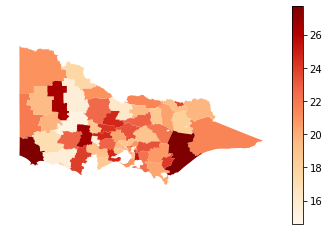

In [17]:
# ensure the merge goes well
depressionLGA.index = depressionLGA.index.str.upper()
plottingLGA = vicLGA.merge(depressionLGA, left_on = 'ABB_NAME', right_on = 'LGA')
plt.figure(figsize = (20,20))
plottingLGA.plot(column = 'Depression Rate', legend=True,cmap='OrRd')
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

In [23]:
vicDHS

,OBJECTID,ServiceAre,ServiceA_1,Division,DivisionID,Shape__Are,Shape__Len,geometry
0,1,Wimmera South West,41,West Division,4,5.683410e+10,1.791899e+06,"POLYGON ((142.36858 -35.29531, 142.37416 -35.2..."
1,2,Central Highlands,42,West Division,4,1.466775e+10,9.661820e+05,"POLYGON ((143.21348 -36.90115, 143.21257 -36.9..."
2,3,Barwon,43,West Division,4,6.285218e+09,7.192523e+05,"POLYGON ((144.40670 -37.80457, 144.40646 -37.8..."
3,4,Western Melbourne,44,West Division,4,7.184475e+08,1.967089e+05,"POLYGON ((144.90311 -37.71703, 144.90316 -37.7..."
4,5,Brimbank Melton,45,West Division,4,6.511187e+08,1.377210e+05,"POLYGON ((144.57295 -37.55383, 144.57312 -37.5..."
5,6,Mallee,21,North Division,2,3.996175e+10,1.840435e+06,"POLYGON ((140.96477 -33.98181, 140.96540 -33.9..."
6,7,Loddon,22,North Division,2,1.902175e+10,1.106916e+06,"POLYGON ((144.38291 -35.88519, 144.38391 -35.8..."
7,8,Hume Moreland,23,North Division,2,5.542677e+08,1.532406e+05,"POLYGON ((144.71049 -37.48210, 144.71063 -37.4..."
8,9,North Eastern Melbourne,24,North Division,2,1.057462e+09,2.327048e+05,"POLYGON ((145.11555 -37.40927, 145.11528 -37.4..."
9,10,Bayside Peninsula,31,South Division,3,1.070851e+09,3.434342e+05,"POLYGON ((144.93850 -37.82589, 144.93865 -37.8..."


<Figure size 1440x1440 with 0 Axes>

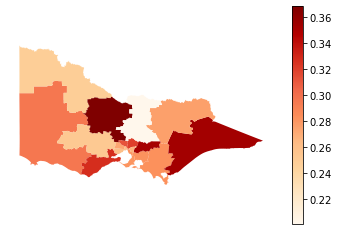

In [35]:
plottingDHS = vicDHS.merge(dhsData[['Depression Rate']], left_on = 'ServiceAre', right_on = 'DHS AREA')
plt.figure(figsize = (20,20))
plottingDHS.plot(column = 'Depression Rate', legend=True,cmap='OrRd')
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

In [50]:
dhsData

,Depression Rate,cyberbullying,electronicMedia,financial,food,healthyFamily,mental_health_access,physicalActivity,psychological,qolSatisfaction,safety,support,trustedAdult
DHS AREA,,,,,,,,,,,,,
Barwon,0.327,0.202918,0.662477,0.047090,0.040,0.226040,0.545123,0.299056,0.102357,0.820620,0.984284,0.931223,0.752718
Bayside Peninsula,0.281,0.325260,0.606603,0.045726,0.035,0.216705,0.497173,0.241793,0.182665,0.751246,0.962529,0.941928,0.719443
Brimbank Melton,0.273,0.348025,0.681328,0.040905,0.062,0.226621,0.424123,0.236756,0.179158,0.759165,0.972838,0.914720,0.691139
Central Highlands,0.252,0.321665,0.620008,0.020097,0.049,0.253368,0.508531,0.240216,0.175436,0.778527,0.978258,0.923932,0.753017
Goulburn,0.201,0.334897,0.609299,0.047842,0.050,0.202554,0.544758,0.283232,0.167415,0.755530,0.955496,0.940423,0.629006
Hume Moreland,0.312,0.317701,0.668218,0.022939,0.078,0.171860,0.566384,0.281743,0.120722,0.752220,0.967533,0.916924,0.688183
Inner Eastern Melbourne,0.267,0.271327,0.527122,0.019938,0.014,0.136813,0.444122,0.266293,0.122815,0.806411,0.967877,0.936543,0.742721
Inner Gippsland,0.283,0.375792,0.622677,0.067882,0.047,0.254668,0.400412,0.242577,0.218755,0.751136,0.973410,0.971628,0.651342
Loddon,0.368,0.210721,NaN,NaN,0.075,NaN,NaN,NaN,NaN,NaN,NaN,0.953934,NaN


In [63]:
for_MI = dhsData.dropna()
indep_var = ['Depression Rate']
dep_vars = for_MI.columns.difference(indep_var).to_list()
mi = [(var, float(mi_reg(for_MI[indep_var], for_MI[var]))) for var in dep_vars]
pd.DataFrame(mi, columns = ['factor', 'MI'])


TypeError: Index(...) must be called with a collection of some kind, 'factor' was passed

[0, 1, 2, 3, 4]